In [24]:
library(blavaan)
library(tidyverse)
library(ggpubr)

In [52]:
library(lavaan)

This is lavaan 0.6-14
lavaan is FREE software! Please report any bugs.



In [48]:
N <- 100
M <- 2
K <- 4
J <- 3

mu <- 0
al <- matrix(c(-1, 1), ncol = 1)
Z <- matrix(rnorm(M*N, sd = .5), ncol = N)
ep_x <- matrix(rnorm(N, sd = 0.1), ncol = N)
X <- t(al) %*% Z + ep_x

U <- matrix(rnorm(K*N, sd = .2), ncol = N)
W <- sweep(U, 2, X, "+")

h_1 <- function(x) sin(2*x)
h_2 <- function(x) exp(x) - 1
f <- function(x) 0
eta <- rnorm(N)
S <- f(X) + h_1(Z[1, ]) + h_2(Z[2, ]) + eta
S <- matrix(S, ncol = N)

beta0 <- matrix(rep(0, J*N), ncol = N)
beta1 <- matrix(rep(2, J), ncol = 1)
ep_y <- matrix(rnorm(J * N, sd = 0.1), ncol = N)
Y <- beta0 + beta1 %*% S + ep_y

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


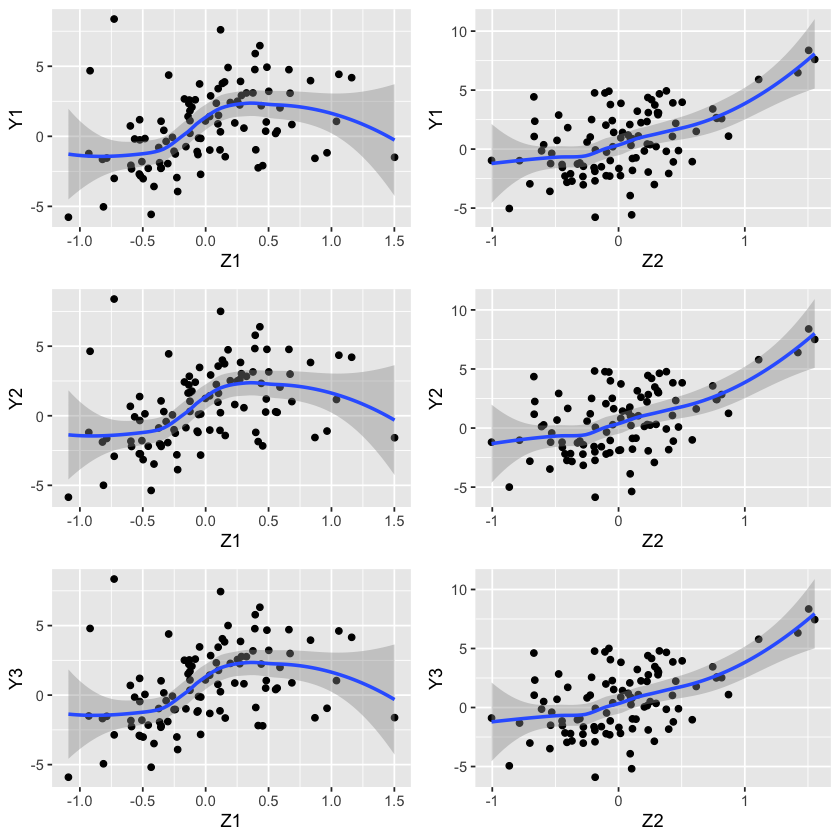

In [49]:
data <- as.data.frame(t(rbind(Z,W,Y)))
names(data) <- c("Z1", "Z2", "W1", "W2", "W3", "W4", "Y1", "Y2", "Y3")

p1 <- ggplot(data, aes(x = Z1, y = Y1)) + geom_point() + geom_smooth()
p2 <- ggplot(data, aes(x = Z2, y = Y1)) + geom_point() + geom_smooth()
p3 <- ggplot(data, aes(x = Z1, y = Y2)) + geom_point() + geom_smooth()
p4 <- ggplot(data, aes(x = Z2, y = Y2)) + geom_point() + geom_smooth()
p5 <- ggplot(data, aes(x = Z1, y = Y3)) + geom_point() + geom_smooth()
p6 <- ggplot(data, aes(x = Z2, y = Y3)) + geom_point() + geom_smooth()

# Draw the plots in a 2x2 grid
ggarrange(p1, p2, p3, p4, p5, p6, ncol = 2, nrow = 3)

## lavaan

In [53]:
mod <- '
Xl =~ 1*W1 + 1*W2 + 1*W3 + 1*W4
Xl ~ Z1 + Z2
Sl =~ Y1 + Y2 + Y3
Sl ~ s(Xl) + s(Z1) + s(Z2)
'

fit_lavaan <- sem(mod, data = data, std.lv = TRUE)
parameterEstimates(fit_lavaan)

ERROR: Error in lav_syntax_parse_rhs(rhs = rhs.formula[[2L]], op = op): lavaan ERROR: I'm confused parsing this line: sXl

